## Calculate correlation metrics for Lx runs

In [25]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr, pearsonr

### Broad

In [3]:
dir_in_Lx = '../out/20.0909 Lx/L200only_reg_rf_boruta_all/'

y_compr_tr = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_tr.pkl'), 'rb'))
y_compr_te = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_te.pkl'), 'rb'))

[Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted'),
 (-3.0, 2.0),
 (-3.0, 2.0),
 Text(0.5, 1.0, 'test')]

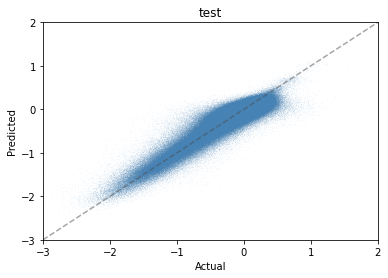

In [6]:
plt.figure()
plt.plot([-3,2], [-3,2], ls="--", c=".3", alpha=0.5)
ax = sns.scatterplot(y_compr_te['actual'].values.flatten(), y_compr_te['predicted'].values.flatten(),
                     s = 1, alpha=0.05, linewidth=0, color='steelblue')
ax.set(xlabel='Actual', ylabel='Predicted', xlim=[-3,2], ylim=[-3,2], title='test')

In [35]:
y_actual = y_compr_te['actual'].values.flatten()
y_pred = y_compr_te['predicted'].values.flatten()

val = pearsonr(y_actual, y_pred)
print(f"r is {val[0]:0.5f}")
print(f"p-value (two-sided) is {val[1]}")

r is 0.92549
p-value (two-sided) is 0.0


### Sanger

In [11]:
dir_in_Lx_sanger = '../out/20.0926 feat Sanger/L200only_reg_rf_boruta_all/'
y_compr_ext = pickle.load(open(os.path.join(dir_in_Lx_sanger, 'anlyz', 'y_compr_ext.pkl'), 'rb'))

[Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted'),
 (-3.0, 2.0),
 (-3.0, 2.0),
 Text(0.5, 1.0, 'Sanger')]

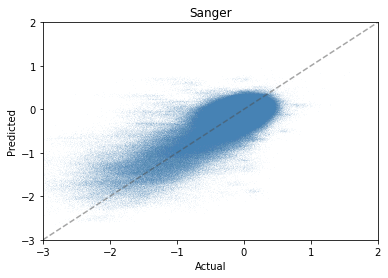

In [13]:
plt.figure()
plt.plot([-3,2], [-3,2], ls="--", c=".3", alpha=0.5)
ax = sns.scatterplot(y_compr_ext['actual'].values.flatten(), y_compr_ext['predicted'].values.flatten(),
                     s = 1, alpha=0.05, linewidth=0, color='steelblue')
ax.set(xlabel='Actual', ylabel='Predicted', xlim=[-3,2], ylim=[-3,2], title='Sanger')

In [36]:
y_actual = y_compr_ext['actual'].values.flatten()
y_pred = y_compr_ext['predicted'].values.flatten()

val = pearsonr(y_actual, y_pred)
print(f"r is {val[0]:0.5f}")
print(f"p-value (two-sided) is {val[1]}")

r is 0.77819
p-value (two-sided) is 0.0


### Randomized

In [41]:
dir_in_Lx = '../out/20.0909 Lx/L200only_reg_rf_boruta_all/'
y_compr_te = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_te.pkl'), 'rb'))

In [47]:
np.random.seed(seed=25)
def getDummyInfer(y):
    return np.random.uniform(-4.4923381539, 3.9745784786800002, size=y.shape[0]) #-4.49.. and 3.97.. are the min and max of CERES scores in the tr dataset
y_pred = y_compr_te['actual'].apply(getDummyInfer, axis=0)

[Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted'),
 (-3.0, 2.0),
 (-3.0, 2.0),
 Text(0.5, 1.0, 'test')]

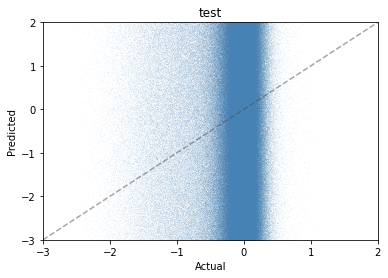

In [48]:
plt.figure()
plt.plot([-3,2], [-3,2], ls="--", c=".3", alpha=0.5)
ax = sns.scatterplot(y_compr_te['actual'].values.flatten(), y_pred.values.flatten(),
                     s = 1, alpha=0.05, linewidth=0, color='steelblue')
ax.set(xlabel='Actual', ylabel='Predicted', xlim=[-3,2], ylim=[-3,2], title='test')

In [49]:
y_actual = y_compr_te['actual'].values.flatten()
y_pred = y_pred.values.flatten()

val = pearsonr(y_actual, y_pred)
print(f"r is {val[0]:0.5f}")
print(f"p-value (two-sided) is {val[1]}")

r is -0.00016
p-value (two-sided) is 0.8419726682405215
